In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Get the original and detected Bounding box with validation image paths from drive/device**

In [24]:
#load the gtruth bbox and predicted bbox from drive
import confusion_matrix_detection as cf
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage


with open('/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_paths.txt','r') as file:
    paths_to_val = file.readlines()
    paths_to_val = [line.rstrip() for line in paths_to_val]

# save np.load
np_load_old = partial(np.load)

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
with open('/content/gdrive/MyDrive/TEST_SET_YOLOV3/BBOXES/labels.npy', 'rb') as f:
    labels = np.load(f)

with open('/content/gdrive/MyDrive/TEST_SET_YOLOV3/BBOXES/detections.npy', 'rb') as f:
    detections = np.load(f)
    
# restore np.load for future normal usage
np.load = np_load_old


**Generate confusion matrix for whole validation data**

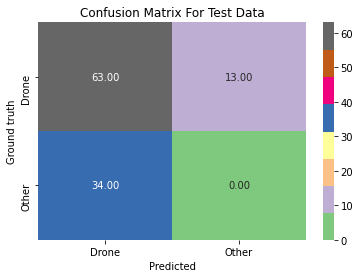

In [7]:
mtx = cf.Confusion_Matrix(labels, detections)
sns.heatmap(mtx,cmap='Accent',annot=True,fmt='.2f',\
                xticklabels=['Drone' , 'Other'], yticklabels=['Drone','Other'])
plt.ylabel('Ground truth')
plt.xlabel('Predicted')
plt.title('Confusion Matrix For Test Data')
plt.show()

**Generate Confusion matrix for 1 image**

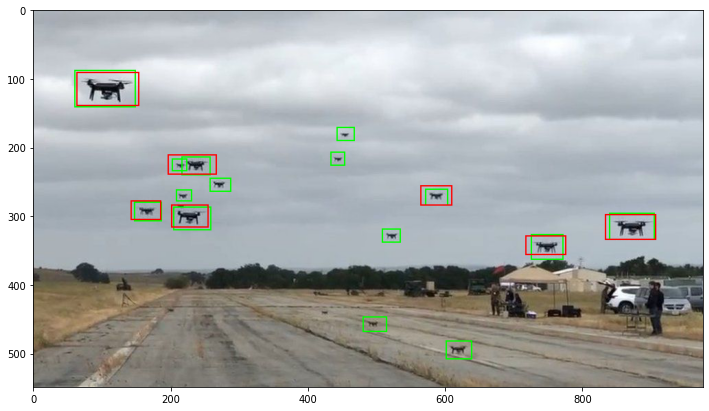

In [32]:
index = 6
im_path = paths_to_val[index]
l_d = labels[index]
p_d = detections[index]
mtx = cf.Confusion_Matrix(np.expand_dims(l_d,axis=0), np.expand_dims(p_d, axis=0))

im = Image.open(im_path)
W , H = im.size
if  l_d.size!= 0:
  bbs_gt = BoundingBoxesOnImage.from_xyxy_array(l_d[:,1:], shape=(W,H))
  im = bbs_gt.draw_on_image(im, size=2, color=[0,255,0])

if p_d.size !=0:
  bbs_pred = BoundingBoxesOnImage.from_xyxy_array(p_d[:,:4], shape=(W,H))
  im = bbs_pred.draw_on_image(im, size=2, color = [255,0,0])
plt.figure(figsize = (12,8))
plt.imshow(im)
plt.show()


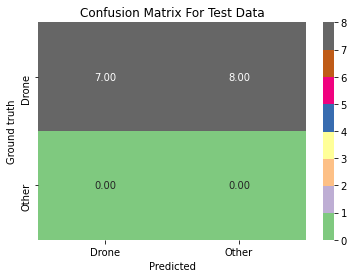

In [31]:
sns.heatmap(mtx,cmap='Accent',annot=True,fmt='.2f',\
                xticklabels=['Drone' , 'Other'], yticklabels=['Drone','Other'])
plt.ylabel('Ground truth')
plt.xlabel('Predicted')
plt.title('Confusion Matrix For Test Data')
plt.show()